In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd
df = pd.read_csv('Data\cumulative_2025.10.03_07.59.03.csv')
df

,loc_rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,9560,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9560,9561,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9561,9562,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385
9562,9563,10155286,K07988.01,NaN,CANDIDATE,CANDIDATE,0.092,0,0,0,...,-128.0,2.992,0.030,-0.027,7.824,0.223,-1.896,296.76288,47.145142,10.998


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc_rowid          9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   kepler_name        2747 non-null   object 
 4   koi_disposition    9564 non-null   object 
 5   koi_pdisposition   9564 non-null   object 
 6   koi_score          8054 non-null   float64
 7   koi_fpflag_nt      9564 non-null   int64  
 8   koi_fpflag_ss      9564 non-null   int64  
 9   koi_fpflag_co      9564 non-null   int64  
 10  koi_fpflag_ec      9564 non-null   int64  
 11  koi_period         9564 non-null   float64
 12  koi_period_err1    9110 non-null   float64
 13  koi_period_err2    9110 non-null   float64
 14  koi_time0bk        9564 non-null   float64
 15  koi_time0bk_err1   9110 non-null   float64
 16  koi_time0bk_err2   9110 

In [6]:
#

In [8]:
# Encode "koi_disposition" as numeric for correlation analysis
df_encoded = df.copy()
df_encoded["koi_disposition_num"] = df_encoded["koi_disposition"].astype("category").cat.codes

# Calculate correlations with "koi_disposition_num"
corr_with_disposition = df_encoded.corr(numeric_only=True)["koi_disposition_num"].drop("koi_disposition_num")
corr_with_disposition = corr_with_disposition.abs()  # Use absolute values for correlation strength
# Sort correlations in descending order
corr_with_disposition_sorted = corr_with_disposition.sort_values(ascending=False)
print(corr_with_disposition_sorted)

koi_score            0.760404
koi_fpflag_ss        0.483310
koi_fpflag_co        0.440421
koi_fpflag_ec        0.327875
koi_teq              0.276133
koi_depth            0.246797
koi_model_snr        0.236386
koi_steff_err1       0.233380
koi_steff_err2       0.215594
koi_tce_plnt_num     0.164169
loc_rowid            0.159110
koi_steff            0.131325
ra                   0.107357
koi_duration         0.105695
koi_slogg_err1       0.098081
dec                  0.089929
koi_impact_err1      0.088213
koi_slogg            0.087897
kepid                0.087095
koi_slogg_err2       0.087066
koi_srad_err1        0.072300
koi_time0bk          0.062639
koi_time0bk_err2     0.057709
koi_time0bk_err1     0.057709
koi_srad_err2        0.056844
koi_insol_err1       0.051446
koi_srad             0.049424
koi_impact           0.046144
koi_kepmag           0.043481
koi_insol            0.038667
koi_insol_err2       0.036804
koi_duration_err2    0.026428
koi_duration_err1    0.026428
koi_fpflag

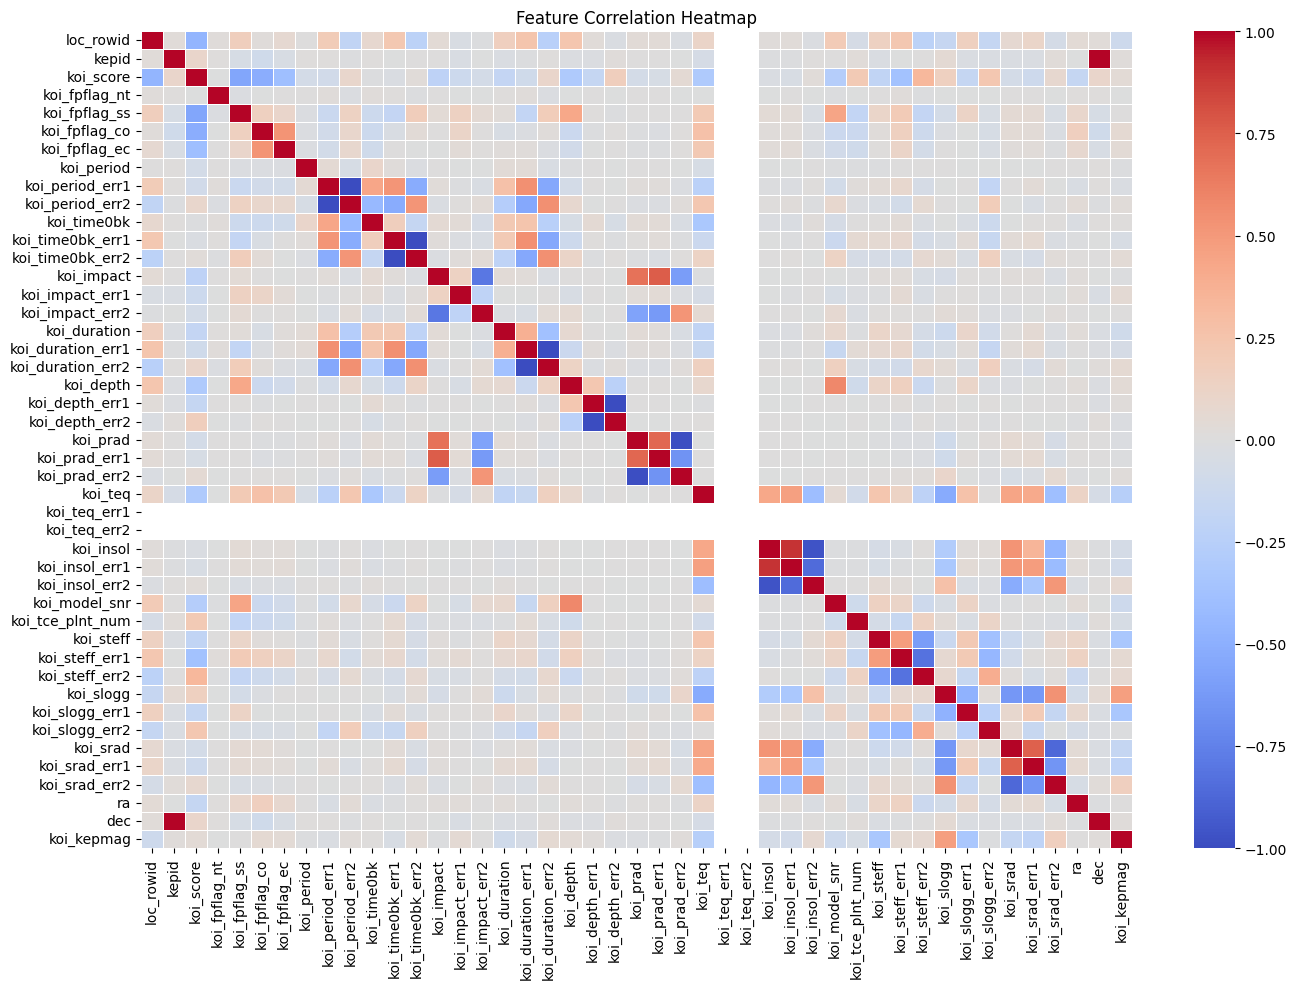

In [5]:
import seaborn as sns

import matplotlib.pyplot as plt

# Compute correlation matrix for numeric columns
corr = df.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Draw the heatmap with seaborn
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0, linewidths=0.5)

plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

In [4]:
# Show correlation matrix between features
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix.style.background_gradient(cmap='coolwarm')

c:\Users\Victus\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\formats\style.py:3807: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
c:\Users\Victus\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\formats\style.py:3808: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,loc_rowid,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
loc_rowid,1.000000,0.027537,-0.468271,0.015948,0.169421,0.021112,0.063081,0.004002,0.195231,-0.195231,0.073954,0.220171,-0.220171,0.039928,-0.034544,-0.012514,0.161223,0.246599,-0.246599,0.241322,0.024530,-0.024530,0.032992,0.031642,-0.030199,0.110341,nan,nan,0.018231,0.030649,-0.018362,0.198562,-0.061197,0.144678,0.233537,-0.226055,-0.160136,0.153480,-0.166890,0.066576,0.106823,-0.067756,0.045642,0.024373,-0.115476
kepid,0.027537,1.000000,0.095225,0.008139,-0.048630,-0.098636,-0.044213,0.011511,0.011611,-0.011611,0.013620,-0.002222,0.002222,0.000358,-0.032893,-0.007212,-0.026407,-0.015497,0.015497,-0.017483,-0.016194,0.016194,0.003681,0.006156,-0.003850,-0.058705,nan,nan,-0.012403,-0.010518,0.013167,0.000998,0.025220,-0.025494,-0.004420,0.003128,0.052255,-0.026706,-0.024098,-0.027171,-0.027871,0.024720,-0.002288,0.993587,0.017525
koi_score,-0.468271,0.095225,1.000000,-0.006986,-0.556077,-0.510013,-0.398247,-0.070669,-0.093077,0.093077,-0.008329,-0.028337,0.028337,-0.214340,-0.121752,-0.072176,-0.173200,-0.095304,0.095304,-0.301010,-0.166398,0.166398,-0.076870,-0.054581,0.049689,-0.302279,nan,nan,-0.030995,-0.043238,0.026134,-0.269034,0.209081,-0.192544,-0.372432,0.333595,0.150017,-0.164267,0.228382,-0.071767,-0.117010,0.075529,-0.168666,0.094944,0.042112
koi_fpflag_nt,0.015948,0.008139,-0.006986,1.000000,-0.023270,-0.004575,0.000576,0.001554,0.021217,-0.021217,0.016143,0.014174,-0.014174,0.001844,-0.003784,-0.003361,0.015080,0.020009,-0.020009,-0.005423,0.001852,-0.001852,0.002195,0.001567,-0.002262,-0.004703,nan,nan,-0.000075,0.001463,-0.000112,-0.007878,-0.003074,0.001885,0.017372,-0.011204,-0.001982,-0.001589,-0.006561,0.000393,0.002640,-0.001160,0.012693,0.007914,-0.003753
koi_fpflag_ss,0.169421,-0.048630,-0.556077,-0.023270,1.000000,0.151233,0.096539,-0.020557,-0.136306,0.136306,-0.117435,-0.174347,0.174347,0.042286,0.148209,0.050605,0.028321,-0.183831,0.183831,0.426244,0.008425,-0.008425,0.001396,0.006222,0.001716,0.204909,nan,nan,0.039564,0.035638,-0.036514,0.437881,-0.182321,0.107830,0.200990,-0.175995,-0.076140,0.123719,-0.043734,0.047205,0.051208,-0.045701,0.086374,-0.048116,0.000628
koi_fpflag_co,0.021112,-0.098636,-0.510013,-0.004575,0.151233,1.000000,0.523851,-0.020804,-0.092136,0.092136,-0.123592,-0.034860,0.034860,0.005343,0.114995,0.001008,-0.046753,-0.020958,0.020958,-0.125225,-0.010779,0.010779,-0.012231,-0.016941,0.011820,0.268092,nan,nan,0.023024,0.024604,-0.015976,-0.127536,-0.132786,0.017717,0.149347,-0.111859,-0.018899,-0.007460,-0.050906,0.041572,0.038069,-0.030926,0.159923,-0.097175,0.060592
koi_fpflag_ec,0.063081,-0.044213,-0.398247,0.000576,0.096539,0.523851,1.000000,-0.017021,-0.082244,0.082244,-0.101114,0.001963,-0.001963,-0.004968,0.034609,0.009899,0.018982,0.016893,-0.016893,-0.086800,-0.003619,0.003619,-0.010145,-0.012598,0.008866,0.217612,nan,nan,0.030209,0.038883,-0.024718,-0.089809,-0.095758,0.011633,0.111744,-0.077747,0.002046,-0.005278,-0.036580,0.019290,0.026828,-0.010113,0.070498,-0.045119,0.039075
koi_period,0.004002,0.011511,-0.070669,0.001554,-0.020557,-0.020804,-0.017021,1.000000,0.053172,-0.053172,0.095580,0.020776,-0.020776,0.004928,-0.001884,-0.003843,0.037302,0.032922,-0.032922,-0.009180,0.002662,-0.002662,0.005135,0.003442,-0.004966,-0.049097,nan,nan,-0.002603,-0.003642,0.002448,-0.009614,-0.015107,-0.013552,0.005325,0.003194,0.001877,-0.006466,-0.003180,-0.000993,-0.000435,0.001556,0.005670,0.011479,-0.00985

In [ ]:
# Columns needed for ExoNet
selected_columns = [
    # Core features
    "koi_period",
    "koi_duration",
    "koi_depth",
    "koi_prad",
    "koi_model_snr",

    # Auxiliary features
    "koi_time0bk",
    "koi_impact",

    # Stellar context
    "koi_steff",
    "koi_slogg",
    "koi_srad",
    "koi_kepmag",

    # Labels / metadata
    "koi_disposition",
    "koi_pdisposition",
    "koi_score",
    "koi_fpflag_nt",
    "koi_fpflag_ss",
    "koi_fpflag_co",
    "koi_fpflag_ec"
]

# Filter dataframe
exo_df = df[selected_columns]

# Quick look at the shape & first rows
print("Selected shape:", exo_df.shape)
exo_df.head()



Selected shape: (9564, 18)


,koi_period,koi_duration,koi_depth,koi_prad,koi_model_snr,koi_time0bk,koi_impact,koi_steff,koi_slogg,koi_srad,koi_kepmag,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec
0,9.488036,2.95750,615.8,2.26,35.8,170.538750,0.146,5455.0,4.467,0.927,15.347,CONFIRMED,CANDIDATE,1.000,0,0,0,0
1,54.418383,4.50700,874.8,2.83,25.8,162.513840,0.586,5455.0,4.467,0.927,15.347,CONFIRMED,CANDIDATE,0.969,0,0,0,0
2,19.899140,1.78220,10829.0,14.60,76.3,175.850252,0.969,5853.0,4.544,0.868,15.436,CANDIDATE,CANDIDATE,0.000,0,0,0,0
3,1.736952,2.40641,8079.2,33.46,505.6,170.307565,1.276,5805.0,4.564,0.791,15.597,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0
4,2.525592,1.65450,603.3,2.75,40.9,171.595550,0.701,6031.0,4.438,1.046,15.509,CONFIRMED,CANDIDATE,1.000,0,0,0,0
